In [5]:
import numpy as np
import matplotlib.pyplot as plt

from DataFormat    import Detector
from plot_spectrum import plot_energy_spectrum, plot_time_spectrum

import glob
import os

In [22]:
SOURCE_LIST = ("60Co", "137Cs", "22Na")
E_FILTER    = ([10, 5, 5], [500, 500, 500])

E_CS   = 661.7  # keV
E_NA_1 = 511.0  # keV
E_NA_2 = 1274.5 # keV
E_CO_1 = 1173.2 # keV
E_CO_2 = 1332.5 # keV
E_CO_3 = 1764.5 # keV

E_CO_SUM_12 = E_CO_1 + E_CO_2
E_CO_SUM_13 = E_CO_1 + E_CO_3
E_CO_SUM_23 = E_CO_2 + E_CO_3

In [23]:
LaBr3_A = Detector(name="labr_a", sources=SOURCE_LIST)

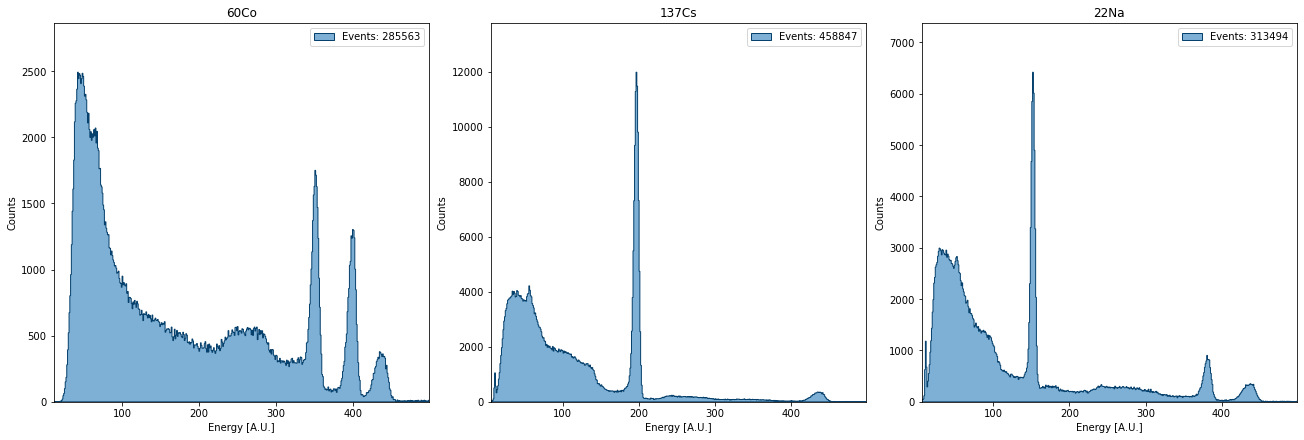

In [25]:
fig = plt.figure(figsize=(18, 6), constrained_layout=True)

for i, source in enumerate(SOURCE_LIST):
    x, y = LaBr3_A.get_energy_histogram(source)
    e_filter = (x > E_FILTER[0][i]) & (x < E_FILTER[1][i])
    ax = plot_energy_spectrum(
            x             = x, 
            y             = y, 
            energy_filter = e_filter,
            bins          = x[e_filter], 
            fig           = fig, 
            title         = f"{source}",
            xlabel        = "Energy [A.U.]",
            nrows         = 1, 
            ncols         = 3, 
            idx           = 1+i,
            label         = f"Events: {np.sum(y[e_filter]):.0f}"
        )
    ax.legend()
    
plt.show()